<a href="https://colab.research.google.com/github/nishat09/Influencers-Gear/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [ ]:
import pandas as p
from google.colab import data_table

In [ ]:
from google.colab import drive


Importing Dataset


In [ ]:
dataset=p.read_csv('heart.csv')

Taking Care of missing values

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Taking Care of duplicate values

In [ ]:
duplicate_dt=dataset.duplicated().any()
print(duplicate_dt)

True


In [ ]:
dataset=dataset.drop_duplicates()
duplicate_dt=dataset.duplicated().any()
print(duplicate_dt)

False


Data Processing 

In [ ]:
categorical_column=[]
numerical_column=[]

for data in dataset.columns:
  if dataset[data].nunique()<=10:
    categorical_column.append(data)
  else:
    numerical_column.append(data)


print(categorical_column)
print(numerical_column)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


Encoding Categorical Data

In [ ]:
dataset['cp'].unique()

categorical_column.remove('sex')
categorical_column.remove('target')
dataset=p.get_dummies(dataset,columns=categorical_column,drop_first=True)



In [ ]:
dataset.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Feature Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
dataset[numerical_column]=sc.fit_transform(dataset[numerical_column])
dataset.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Splitting Dataset into Training set and test set

In [ ]:
x=dataset.drop('target',axis=1)
y=dataset['target']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_test


,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logR=LogisticRegression()
logR.fit(x_train,y_train)


y_prediction1=logR.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_prediction1)

0.7868852459016393

SVC

In [ ]:
from sklearn import svm
svm=svm.SVC()

svm.fit(x_train,y_train)


y_prediction2=svm.predict(x_test)

accuracy_score(y_test,y_prediction2)

0.8032786885245902

KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

y_prediction3=knc.predict(x_test)

accuracy_score(y_test,y_prediction3)

0.7377049180327869

Non-Linear ML Algorithms

In [ ]:
dataset=p.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset=dataset.drop_duplicates()
dataset.shape

(302, 14)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)
y_prediction4=dtc.predict(x_test)
accuracy_score(y_test,y_prediction4)



0.7213114754098361

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)
y_prediction5=rfc.predict(x_test)
accuracy_score(y_test,y_prediction5)

0.7868852459016393

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

rbc=GradientBoostingClassifier()

rbc.fit(x_train,y_train)
y_prediction6=rbc.predict(x_test)
accuracy_score(y_test,y_prediction6)

0.7540983606557377

In [ ]:
final_data=p.DataFrame({'Models':['LR','SVM','KNN','DTC','RFC','GBC'],"Accuracy":[accuracy_score(y_test,y_prediction1),accuracy_score(y_test,y_prediction2),accuracy_score(y_test,y_prediction3),accuracy_score(y_test,y_prediction4),accuracy_score(y_test,y_prediction5),accuracy_score(y_test,y_prediction6)]})


print(final_data)

  Models  Accuracy
0     LR  0.786885
1    SVM  0.803279
2    KNN  0.737705
3    DTC  0.721311
4    RFC  0.786885
5    GBC  0.754098


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


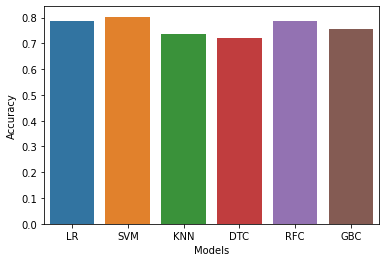

In [ ]:
import seaborn 

seaborn.barplot(final_data['Models'],final_data['Accuracy'])

In [ ]:
x=dataset.drop('target',axis=1)
y=dataset['target']

x.shape

(302, 13)

In [ ]:
from sklearn import svm
svm=svm.SVC()

svm.fit(x,y)

SVC()

In [ ]:
import pandas as pd

new_data=p.DataFrame({
    'age':54,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3}
    ,index=[0])


new_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,54,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
x=svm.predict(new_data)

if x[0]==0:
  print("Heart Disease Not Predicted")
else:
  print("Heart Disease Predicted")



Heart Disease Predicted


In [ ]:
import joblib

joblib.dump(svm,'model_joblib_heart')


model=joblib.load('model_joblib_heart')
model.predict(new_data)

array([1])

In [ ]:
import pandas as p

user_dict={}


age=int(input('Enter Your Age '))
user_dict['age']=age
sex=int(input('Input 1 for male,0 for female '))
user_dict['sex']=sex
cp=int(input('Enter value of cp '))
user_dict['cp']=cp
trestbps=int(input('Enter value of trestbps '))
user_dict['trestbps']=trestbps
chol=int(input('Enter value of chol '))
user_dict['chol']=chol
fbs=int(input('Enter value of fbs '))
user_dict['fbs']=fbs
restecg=int(input('Enter value of restecg '))
user_dict['restecg']=restecg
thalach=int(input('Enter value of thalach '))
user_dict['thalach']=thalach
exang=int(input('Enter value of exang '))
user_dict['exang']=exang
oldpeak=float(input('Enter value of oldpeak '))
user_dict['oldpeak']=oldpeak
slope=int(input('Enter value of slope '))
user_dict['slope']=slope
ca=int(input('Enter value of ca '))
user_dict['ca']=ca
thal=int(input('Enter value of thal '))
user_dict['thal']=thal


user_data=p.DataFrame(user_dict,index=[0])





x=svm.predict(user_data)

if x[0]==0:
  print("Heart Disease Not Predicted")
else:
  print("Heart Disease Predicted")



Enter Your Age 52
Input 1 for male,0 for female 1
Enter value of cp 125
Enter value of trestbps 23
Enter value of chol 256
Enter value of fbs 124
Enter value of restecg 65
Enter value of thalach 45
Enter value of exang 25
Enter value of oldpeak 125
Enter value of slope 12
Enter value of ca 14
Enter value of thal 265
Heart Disease Not Predicted
